                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Number of clusters (DBSCAN): 0
Silhouette score for k=2: 0.008736205351151865
Silhouette score for k=3: 0.007264175755596038
Silhouette score for k=4: 0.004991544818855823
Silhouette score for k=5: 0.004970576407976006
Silhouette score for k=6: -0.0024902130738434394
Silhouette score for k=7: -0.002968331153379897
Silhouette score for k=8: -0.004529018437097831
Silhouette score for k=9: -0.00473050504611572
Silhouette score for k=10: -0.004344452848444168
Best number of clusters (k) according to silhouette score: 2


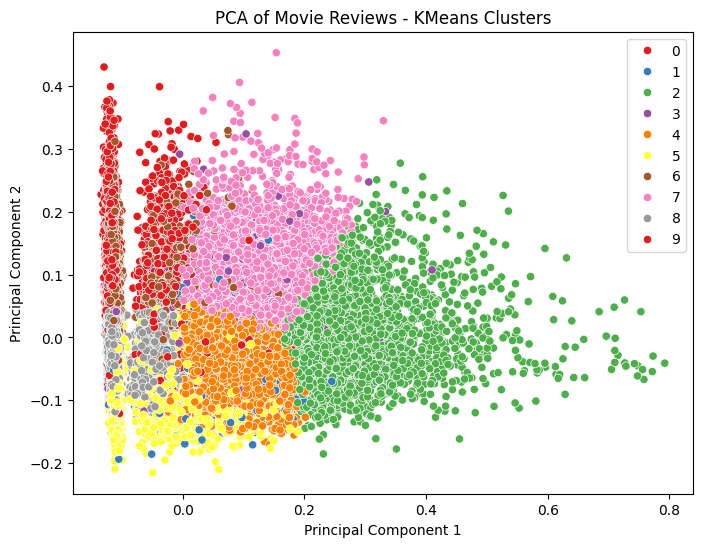

Adjusted Rand Index (ARI) for KMeans: 0.012
Homogeneity score for KMeans: 0.058
ARI for DBSCAN not calculated due to outliers (-1).
Homogeneity for DBSCAN not calculated due to outliers (-1).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # convert categorical labels into numeric 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1. Load the dataset ----
df = pd.read_csv("IMDBDataset.csv")
print(df.head())

# ---- 2. Split into training and test sets ----
X = df['review']  # Reviews (Text)
y = df['sentiment']  # Sentiment (Labels)

# Encode sentiment labels (if needed): 'positive' -> 1, 'negative' -> 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- 3. Convert the text into numerical features using TF-IDF ----
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ---- 4. Clustering  ----

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_vec)
kmeans_labels = kmeans.labels_

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_vec)

# DBSCAN does not have a fixed number of clusters, so it might return -1 for outliers
print(f"Number of clusters (DBSCAN): {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")

# Define a range of clusters to test for KMeans (Trying k values from 2 to 10)
k_range = range(2, 11)
best_score = -1
best_k = 2

# Finding the best k for KMeans using silhouette score
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_train_vec)
    score = silhouette_score(X_train_vec, kmeans_labels)
    print(f"Silhouette score for k={k}: {score}")
    
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best number of clusters (k) according to silhouette score: {best_k}")

# ---- 5. Dimensionality Reduction using PCA ----
# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_vec.toarray())  # Convert sparse matrix to dense

# Plot the results of KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="Set1", legend="full")
plt.title("PCA of Movie Reviews - KMeans Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# ---- 6. Calculate and print Adjusted Rand Index and Homogeneity ----
# These scores are available since you have true labels (y_train)

# ARI for KMeans (measuring similarity between KMeans clusters and the true sentiment labels)
ari_kmeans = adjusted_rand_score(y_train, kmeans_labels)
print(f"Adjusted Rand Index (ARI) for KMeans: {ari_kmeans:.3f}")

# Homogeneity score for KMeans (whether clusters have points from the same category)
homogeneity_kmeans = homogeneity_score(y_train, kmeans_labels)
print(f"Homogeneity score for KMeans: {homogeneity_kmeans:.3f}")

# ARI for DBSCAN (DBSCAN might have outliers, so it may not work well with ARI)
ari_dbscan = adjusted_rand_score(y_train, dbscan_labels) if -1 not in dbscan_labels else None
print(f"Adjusted Rand Index (ARI) for DBSCAN: {ari_dbscan:.3f}" if ari_dbscan else "ARI for DBSCAN not calculated due to outliers (-1).")

# Homogeneity score for DBSCAN
homogeneity_dbscan = homogeneity_score(y_train, dbscan_labels) if -1 not in dbscan_labels else None
print(f"Homogeneity score for DBSCAN: {homogeneity_dbscan:.3f}" if homogeneity_dbscan else "Homogeneity for DBSCAN not calculated due to outliers (-1).")

# ---- 7. Optionally, apply t-SNE for visualization ----
# Apply t-SNE for better separation
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_vec.toarray())

# Plot the results of t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette="Set1", legend="full")
plt.title("t-SNE of Movie Reviews - KMeans Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()
